In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') 
zip_ref.extractall('/covid') 
zip_ref.close()

In [3]:
import pathlib

data_dir_covid = pathlib.Path('/covid/COVID')
data_dir_non_covid = pathlib.Path('/covid/non-COVID')

In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders
splitfolders.ratio('/covid', output="/there", seed=1337, ratio=(.7,0,0.3)) 

Copying files: 2481 files [00:00, 2866.13 files/s]


In [6]:
data_dir_train = pathlib.Path('/there/train')
data_dir_train_covid = '/there/train/COVID'
data_dir_train_nocovid = '/there/train/non-COVID'
data_dir_test = pathlib.Path('/there/test')
data_dir_test_covid = '/there/test/COVID'
data_dir_test_nocovid = '/there/test/non-COVID'

In [ ]:
#check total image count
#as it's already known that all images are of type.png.
img_count_train = len(list(data_dir_train.glob('*/*.png'))) 
img_count_test = len(list(data_dir_test.glob('*/*.png'))) 

print("Image count in Train set: ",img_count_train)
print("Image count in Test set: ",img_count_test)

Image count in Train set:  1736
Image count in Test set:  745


In [7]:
import cv2 as cv          #OpenCV
import numpy as np   #Numpy για αριθμητικές πράξεις με πίνακες
import os
from matplotlib import pyplot as plt

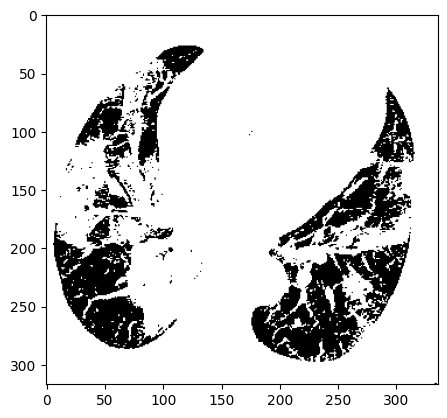

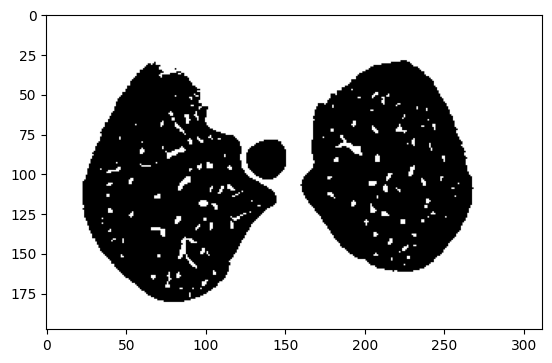

black pixels covid  =  56301
black pixels no covid  =  64104


In [8]:
#from typing_extensions import ClassVar
covid = '/there/test/COVID/Covid (1009).png'
nocovid = '/there/test/non-COVID/Non-Covid (486).png'
img1 = cv.imread(covid)
img2 = cv.imread(nocovid)

ret,covid_img = cv.threshold(img1,120,255,cv.THRESH_BINARY)
ret2,nocovid_img = cv.threshold(img2,120,255,cv.THRESH_BINARY)  
plt.imshow(covid_img )
plt.show()
plt.imshow(nocovid_img )
plt.show()
number_of_black_pix_covid = np.sum(covid_img == 0)
number_of_black_pix_nocovid = np.sum(nocovid_img == 0)
print('black pixels covid  = ',number_of_black_pix_covid)
print('black pixels no covid  = ',number_of_black_pix_nocovid)

In [ ]:
def black(path):
  img = cv.imread(path)
  ret,thresh = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
  number_of_black_pix = np.sum(thresh == 0)
  return number_of_black_pix

In [ ]:
def avg(folder):
  files =  os.listdir(folder)
  num_of_images = len(files)
  sum = 0
  for file in files:
      path = os.path.join(folder, file)
      num_black_pixels = black(path)
      # print(num_black_pixels)
      sum = num_black_pixels + sum
  avg = sum/num_of_images 
  return avg

In [ ]:
avg_covid = avg(data_dir_train_covid)
print(avg_covid)

93602.47716894977


In [ ]:
avg_nocovid = avg(data_dir_train_nocovid)
print(avg_nocovid)

140814.8581395349


In [ ]:
def classification(folder,avg_covid,avg_nocovid,new_covid_paths,new_nocovid_paths):
  files =  os.listdir(folder)
  for file in files:
      path = os.path.join(folder, file)
      black_pixels = black(path)
      if abs(black_pixels-avg_covid)>abs(black_pixels-avg_nocovid):
        new_nocovid_paths.append(path)
      else:
        new_covid_paths.append(path)
  return new_nocovid_paths,new_covid_paths

In [ ]:

print(len(os.listdir(data_dir_test_covid)))
print(len(os.listdir(data_dir_test_nocovid)))


376
369


non-Covid accuracy

In [ ]:
new_covid_paths= []
new_nocovid_paths = []
nocovid,covid = classification(data_dir_test_nocovid,avg_covid,avg_nocovid,new_covid_paths,new_nocovid_paths)
correct_nocovid = len(nocovid)
print(correct_nocovid)

250


Covid accuracy

In [ ]:
new_covid_paths= []
new_nocovid_paths = []
nocovid,covid = classification(data_dir_test_covid,avg_covid,avg_nocovid,new_covid_paths,new_nocovid_paths)
correct_covid = len(covid)
print(correct_covid)

238


Total Accuracy

In [ ]:
acc = (correct_nocovid + correct_covid)/(len(os.listdir(data_dir_test_covid))+len(os.listdir(data_dir_test_nocovid)))
print(acc)

0.6550335570469799
